In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Cancer_Data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.drop(columns= ['id','Unnamed: 32'], inplace=True)
df.drop_duplicates(inplace=True)


In [ ]:
label_dict = {"M": 0, "B": 1}
df["diagnosis"]= df["diagnosis"].map(label_dict)


## High dimensional dataset. Let's check multicollinearity among the features

In [ ]:
X= df.drop("diagnosis",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X_scaled, i) for i in range(X.shape[1])]
vif["Features"] = X.columns


# Print the VIF table
print(vif.sort_values(by="VIF Factor",ascending=False))

     VIF Factor                 Features
0   3806.115296              radius_mean
2   3786.400419           perimeter_mean
20   799.105946             radius_worst
22   405.023336          perimeter_worst
3    347.878657                area_mean
23   337.221924               area_worst
10    75.462027                radius_se
6     70.767720           concavity_mean
12    70.359695             perimeter_se
7     60.041733      concave points_mean
5     50.505168         compactness_mean
13    41.163091                  area_se
25    36.982755        compactness_worst
27    36.763714     concave points_worst
26    31.970723          concavity_worst
29    18.861533  fractal_dimension_worst
21    18.569966            texture_worst
9     15.756977   fractal_dimension_mean
16    15.694833             concavity_se
15    15.366324           compactness_se
1     11.884048             texture_mean
17    11.520796        concave points_se
24    10.923061         smoothness_worst
19     9.717987 

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)


c) perimeter
d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



In [ ]:
X.drop(columns=["perimeter_mean","area_mean","perimeter_worst","area_worst","area_se","perimeter_se"], inplace=True)

In [ ]:
Xscale= scaler.fit_transform(X)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(Xscale, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

# Print the VIF table
print(vif.sort_values(by="VIF Factor",ascending=False))

    VIF Factor                 Features
4    62.412701           concavity_mean
5    56.173416      concave points_mean
16   41.856768             radius_worst
0    36.810455              radius_mean
19   34.369937        compactness_worst
21   34.066341     concave points_worst
20   31.061220          concavity_worst
3    29.407348         compactness_mean
23   18.127464  fractal_dimension_worst
17   17.918701            texture_worst
11   14.810564           compactness_se
12   14.274138             concavity_se
7    13.715882   fractal_dimension_mean
1    11.528711             texture_mean
18   10.706441         smoothness_worst
13    9.321960        concave points_se
22    9.182290           symmetry_worst
15    8.872185     fractal_dimension_se
2     7.682738          smoothness_mean
8     5.237515                radius_se
14    5.018464              symmetry_se
6     4.109345            symmetry_mean
9     3.969615               texture_se
10    3.855691            smoothness_se


In [ ]:
scaled_df = pd.DataFrame(data=Xscale, columns=X.columns)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(Xscale, y, test_size=0.2)

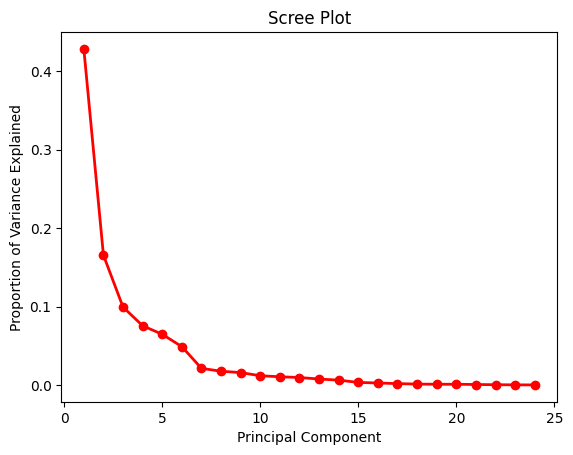

In [ ]:
# perform PCA
pca = PCA()
pca.fit(X_train)

# generate scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# determine the number of principal components to retain
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance > 0.95) + 1

# perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
nb = GaussianNB()

# Define a list of models
models = [lr, rf, xgb, nb]

# Train each model and compute cross-validation score
cv_scores = []
for model in models:
    scores = cross_val_score(model, X_pca, y_train, cv=5)
    cv_scores.append(scores.mean())

# Select the model with the highest cross-validation score
best_model = models[np.argmax(cv_scores)]
best_model.fit(X_pca, y_train)


LogisticRegression()

In [ ]:
# apply the same PCA transformation to X_test as X_train
X_test_pca = pca.transform(X_test)


In [ ]:
y_pred = lr.predict(X_test_pca)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.97      0.99      0.98        79

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

